In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import sweetviz as sv

# Load the data

In [3]:
year = 2020
df = pd.read_csv(f"dataset/min_{year}.csv")

/home/siewe/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (18,19,21,23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Data preprocessing

In [4]:
df.shape

(200000, 41)

In [5]:
df.head()

,Unnamed: 0,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,...,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
0,0,2020-1,2020-01-07,1,Vente,8000.0,NaN,NaN,FORTUNAT,B063,...,NaN,NaN,NaN,T,terres,NaN,NaN,1061.0,5.323540,46.171919
1,1,2020-2,2020-01-02,1,Vente,2175.0,NaN,NaN,TERRES DES CINQ SAULES,B124,...,NaN,NaN,NaN,BT,taillis simples,NaN,NaN,85.0,4.893436,46.251868
2,2,2020-2,2020-01-02,1,Vente,2175.0,NaN,NaN,BOIS DU CHAMP RION,B006,...,NaN,NaN,NaN,T,terres,NaN,NaN,1115.0,4.899919,46.235327
3,3,2020-2,2020-01-02,1,Vente,2175.0,NaN,NaN,EN COROBERT,B025,...,NaN,NaN,NaN,T,terres,NaN,NaN,1940.0,4.882347,46.246519
4,4,2020-2,2020-01-02,1,Vente,2175.0,NaN,NaN,TERRES DES CINQ SAULES,B124,...,NaN,NaN,NaN,T,terres,NaN,NaN,1148.0,4.894688,46.251820


In [6]:
df.nature_culture_speciale.value_counts()

Jardin potager                            1151
Pâture plantée                             923
Oliveraie ou oliviers                      609
Châtaigneraie                              539
Friche                                     531
Pins                                       444
Terrain vague                              398
Sapins ou sapinière                        338
Vins d'appellation d'origine contrôlée     270
Chemin (non groupe)                        252
Parc                                       167
Etangs                                     163
Pré marais                                 142
Rue                                        133
Chênes                                     130
Jardin d'agrément                          130
Acacias                                     71
Jardin maraîcher non aménagé                69
Jardin floral                               60
Mare                                        52
Canal                                       47
Terrain de sp

In [7]:
df.adresse_code_voie=df.adresse_code_voie.astype(str)
df.code_commune=df.code_commune.astype(str)
df.code_departement=df.code_departement.astype(str)
df.numero_volume=df.numero_volume.astype(str)
df.lot1_numero=df.lot1_numero.astype(str)
df.lot2_numero=df.lot2_numero.astype(str)
df.lot3_numero=df.lot3_numero.astype(str)
df.lot4_numero=df.lot4_numero.astype(str)
df.lot5_numero=df.lot5_numero.astype(str)
df.date_mutation = pd.to_datetime(df.date_mutation)

In [8]:
df.index = df.date_mutation

In [9]:
m=12
i = df[["valeur_fonciere","latitude","longitude"]]
i = i.loc[f"2020-{m}",:]
i[~(i.latitude.isna() & i.longitude.isna())][["latitude","longitude"]]

,latitude,longitude
date_mutation,,
2020-12-02,46.349690,6.133268
2020-12-02,46.178537,5.738449
2020-12-07,45.803695,5.445676
2020-12-02,46.370306,6.150213
2020-12-02,46.370306,6.150213
...,...,...
2020-12-23,48.296395,4.075056
2020-12-11,48.491434,3.496267
2020-12-11,48.491434,3.496267


<AxesSubplot:xlabel='date_mutation'>

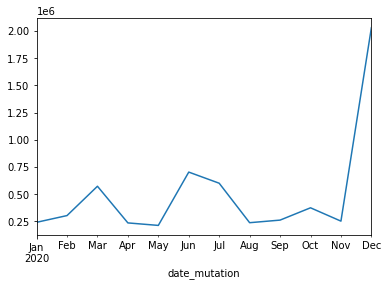

In [10]:
df.loc[:,"valeur_fonciere"].resample("M").mean().plot()

In [10]:
sv_report = sv.analyze(df)
sv_report.show_html()

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:01 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [11]:
df.code_type_local.value_counts()

1.0    528257
2.0    402271
3.0    298369
4.0     86937
Name: code_type_local, dtype: int64

In [12]:
a=df.count()
a[a >= .8*df.shape[0]]

id_mutation           2459560
date_mutation         2459560
numero_disposition    2459560
nature_mutation       2459560
valeur_fonciere       2427808
adresse_nom_voie      2428437
adresse_code_voie     2459560
code_postal           2428568
code_commune          2459560
nom_commune           2459560
code_departement      2459560
id_parcelle           2459560
numero_volume         2459560
lot1_numero           2459560
lot2_numero           2459560
lot3_numero           2459560
lot4_numero           2459560
lot5_numero           2459560
nombre_lots           2459560
longitude             2429477
latitude              2429477
dtype: int64

# Data Visualization

In [13]:
# Communes with the highest number of transactions
a = df[["id_mutation", "nom_commune"]].groupby("nom_commune").count()

In [14]:
a= a.sort_values(by="id_mutation", ascending=False)[:15]
a = pd.DataFrame({"nom_commune": a.index.values, "id_mutation": a.id_mutation.values})
a

,nom_commune,id_mutation
0,Nice,17756
1,Nantes,14715
2,Bordeaux,12847
3,Lille,10628
4,Rennes,9721
5,Toulouse,8854
6,Nîmes,8571
7,Saint-Étienne,7400
8,Reims,7110
9,Angers,6642


In [15]:
a = df[["latitude","longitude"]]
a[~(a.latitude.isna() & a.longitude.isna())]

,latitude,longitude
date_mutation,,
2020-01-07,46.171919,5.323540
2020-01-02,46.251868,4.893436
2020-01-02,46.235327,4.899919
2020-01-02,46.246519,4.882347
2020-01-02,46.251820,4.894688
...,...,...
2020-12-16,48.854293,2.350481
2020-12-16,48.854293,2.350481
2020-12-16,48.854293,2.350481


# Performing cross analysis

In [80]:
data = df.loc[:,"valeur_fonciere"].resample("M").mean()
b = pd.DataFrame({"valeurs": data.values, "mois": data.index.month})
b

,valeurs,mois
0,2.415084e+05,1
1,3.034519e+05,2
2,5.730814e+05,3
3,2.359834e+05,4
4,2.129781e+05,5
5,7.033261e+05,6
6,6.009230e+05,7
7,2.379050e+05,8
8,2.617223e+05,9
9,3.749722e+05,10


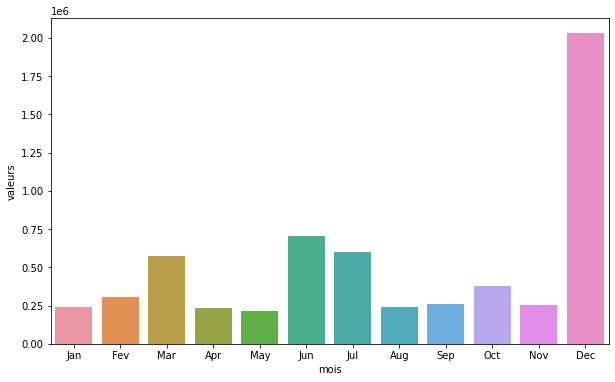

In [82]:
fig, ax= plt.subplots(figsize=(10,6))
ax = sns.barplot(data=b, x="mois", y="valeurs")
ax.set_xticklabels('Jan Fev Mar Apr May Jun Jul Aug Sep Oct Nov Dec'.split())
ax.set_xticks(np.arange(12))

In [86]:
df2017 = pd.read_csv("dataset/min_2017.csv")
df2018 = pd.read_csv("dataset/min_2018.csv")

/home/siewe/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (15,17,19,21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/siewe/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (15,17,19,21,23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [102]:
def preprocess(df_):
    df = df_.copy()
    df.adresse_code_voie=df.adresse_code_voie.astype(str)
    df.code_commune=df.code_commune.astype(str)
    df.code_departement=df.code_departement.astype(str)
    df.numero_volume=df.numero_volume.astype(str)
    df.lot1_numero=df.lot1_numero.astype(str)
    df.lot2_numero=df.lot2_numero.astype(str)
    df.lot3_numero=df.lot3_numero.astype(str)
    df.lot4_numero=df.lot4_numero.astype(str)
    df.lot5_numero=df.lot5_numero.astype(str)
    df.date_mutation=pd.to_datetime(df.date_mutation)
    df.index = df.date_mutation
    return df

def load_data(year):
    df = pd.read_csv(f"dataset/min_{year}.csv")
    return df

In [103]:
def cities_biggest_price_increase():
    years = []
    for i in range(4):
        years.append(preprocess(load_data(2020-i)))
    return pd.concat(years, axis=0)

In [105]:
a = cities_biggest_price_increase()

/tmp/ipykernel_10628/3652150241.py:4: DtypeWarning: Columns (18,19,21,23) have mixed types.Specify dtype option on import or set low_memory=False.
  years.append(preprocess(load_data(2020-i)))
/tmp/ipykernel_10628/3652150241.py:4: DtypeWarning: Columns (15,17,19,21,23) have mixed types.Specify dtype option on import or set low_memory=False.
  years.append(preprocess(load_data(2020-i)))
/tmp/ipykernel_10628/3652150241.py:4: DtypeWarning: Columns (15,17,19,21) have mixed types.Specify dtype option on import or set low_memory=False.
  years.append(preprocess(load_data(2020-i)))


In [130]:
a = a[["code_departement", "valeur_fonciere"]].groupby("code_departement").max()-a[["code_departement", "valeur_fonciere"]].groupby("code_departement").min()
a["code"] = a.index

In [176]:
b = df[df.nom_commune == "Erp"].type_local.value_counts()


In [177]:
b

Maison    4
Name: type_local, dtype: int64

In [181]:
df["prix/m^2"] = df.valeur_fonciere/df.surface_terrain